In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.shape

(13320, 9)

In [5]:
dataset.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df=dataset.drop(['area_type','availability','society','balcony'],axis='columns')

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1=df.dropna()
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.isnull().sum()#data cleaning

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df1.shape

(13246, 5)

In [12]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\PC\AppData\Local\Temp\ipykernel_5232\2458643058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df1.total_sqft.unique() # some of the data in the form of range,detect the given column is folat or nt

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df1[~df1['total_sqft'].apply(is_float)].head(10)#still data is nt uniform

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqrt_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        
    

In [20]:
convert_sqrt_to_num('1015 - 1540')

1277.5

In [21]:
convert_sqrt_to_num("34.46Sq. Meter") # returns ntg

In [22]:
df2=df1.copy()
df2['total_sqft']=df1['total_sqft'].apply(convert_sqrt_to_num)

In [23]:
df2['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [24]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
df3=df2.copy()
df3['price_per_sqft']=df2['price']*100000/df2['total_sqft']

In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df.location.unique())

1306

In [28]:
df3.location=df3.location.apply(lambda x: x.strip())
df3_location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [29]:
df3_location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
len(df3_location_stats[df3_location_stats<=10])

1052

In [31]:
location_stats_less10=df3_location_stats[df3_location_stats<=10]
location_stats_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
df3_location=df3.location.apply(lambda x:'other' if x in location_stats_less10 else x)

In [33]:
len(df3_location.unique())

242

In [34]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [35]:
df3.shape

(13246, 7)

In [36]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [37]:
df4.shape # remove some outliers

(12502, 7)

In [38]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
                                

In [40]:
df5=remove_outliers(df4)

In [41]:
df5.shape

(9267, 7)

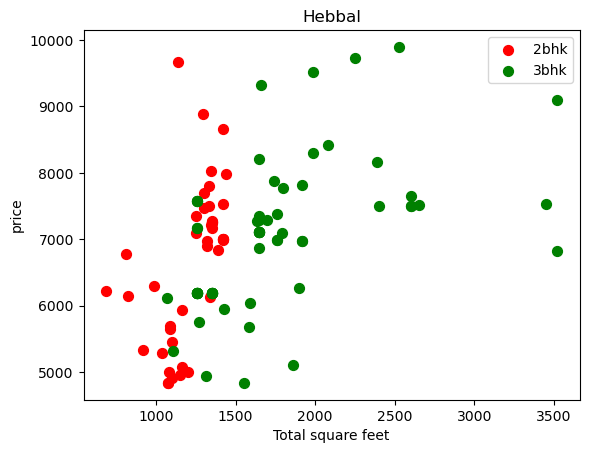

In [42]:
def scatter_plot(df,location):
    
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='r',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='g',label='3bhk',s=50)

    plt.xlabel('Total square feet')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
scatter_plot(df5,'Hebbal')



In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7504, 7)

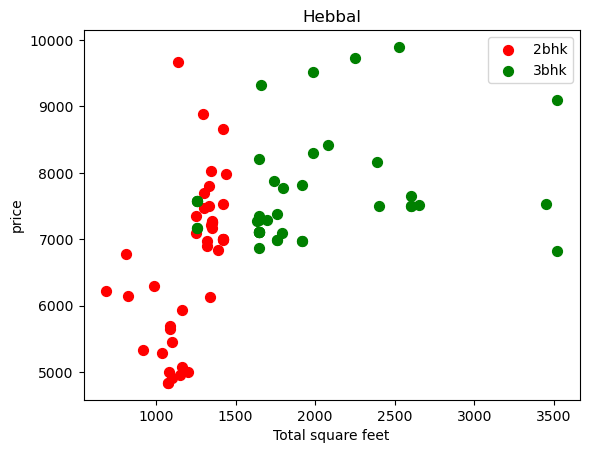

In [44]:
scatter_plot(df6,'Hebbal')

Text(0, 0.5, 'count')

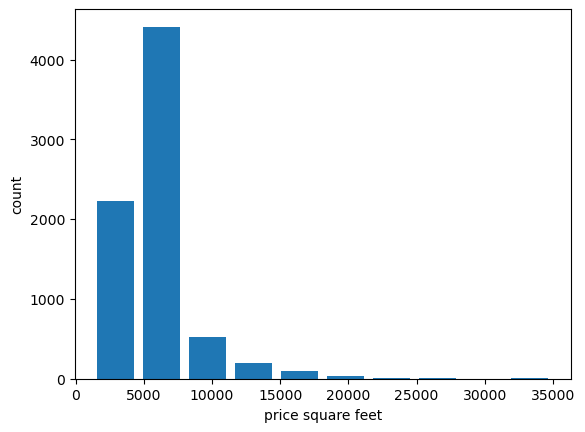

In [45]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('price square feet')
plt.ylabel('count')

In [46]:
df6.bath.unique()

array([ 3.,  1.,  4.,  2.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [47]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6183,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'count')

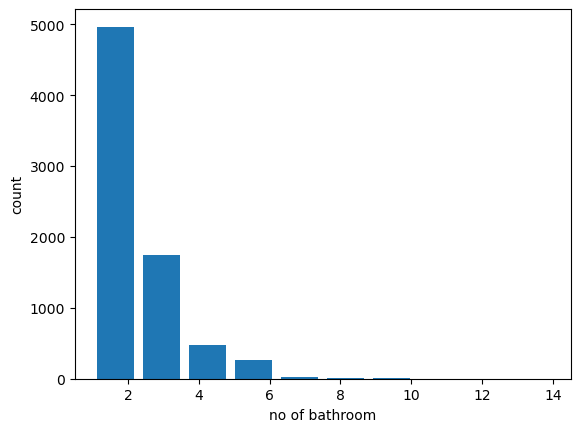

In [48]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel('no of bathroom')
plt.ylabel('count')

In [49]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1951,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6117,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7431,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7914,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [50]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7425, 7)

In [51]:
df7=df6.drop(['size','price_per_sqft'],axis='columns')
df7.shape
df7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4


In [52]:
pd.get_dummies(df7.location,dtype=int)

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
dummies=pd.get_dummies(df7.location,dtype=int)
dummies.head(3)

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df8=pd.concat([df7,dummies],axis='columns')

In [55]:
df8.head()

,location,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1st Block BEL Layout,1540.0,3.0,85.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,1.0,45.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,4.0,150.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,2300.0,3.0,80.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block HRBR Layout,1250.0,2.0,67.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df9=df8.drop('location',axis='columns')
df9.head()

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,85.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,150.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,80.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,67.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df9.shape

(7504, 765)

In [58]:
x=df9.drop('price',axis='columns')

In [59]:
y=df9['price']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
print(x.shape,x_train.shape,x_test.shape)

(7504, 764) (6003, 764) (1501, 764)
